In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Loading data for a mall's customers 
customer = pd.read_csv('/content/Mall_Customers.csv', index_col = 0 )

In [4]:
customer.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81


In [5]:
#Normalizing labels with label encoder
from sklearn.preprocessing import StandardScaler,LabelEncoder
lc=LabelEncoder()
customer['Gender'] = lc.fit_transform(customer['Gender'])

In [6]:
#Finding the optimum number of clusters using elbow method
from sklearn.cluster import KMeans
wc = []

for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit_predict(customer)
    wc.append(km.inertia_)

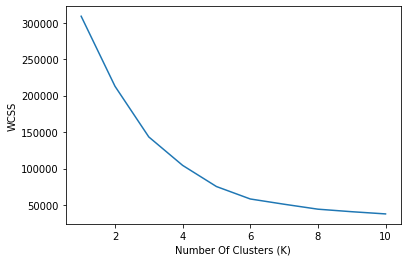

In [7]:
#Visualizing the elbow graph
plt.plot(range(1,11), wc)
plt.xlabel('Number Of Clusters (K)')
plt.ylabel("WCSS")
plt.show()

In [8]:
km = KMeans(n_clusters = 6)

In [9]:
#Fitting the model
Cluster = km.fit_predict(np.array(customer))

In [10]:
Cluster

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 5,
       4, 2, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 0, 5, 0, 3, 0, 3, 0, 3, 0,
       5, 0, 3, 0, 3, 0, 3, 0, 3, 0, 5, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [11]:
#Adding a new column in our dataset to show the clusters
customer['Clusters'] = Cluster

In [12]:
#Creating a 3D plot to show the clusters for all the three dependent variables
import plotly.express as px
fig = px.scatter_3d(customer, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color='Clusters',opacity=0.8)
fig.show()